# Bayesian Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import multivariate_normal
import textwrap
import math
%matplotlib inline  


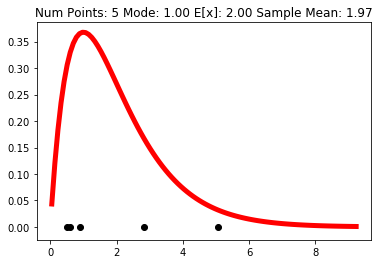

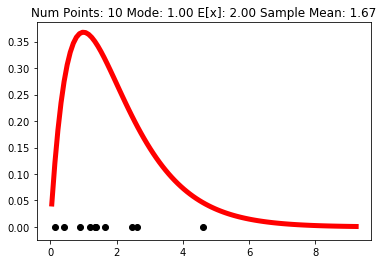

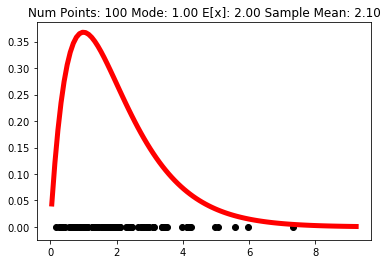

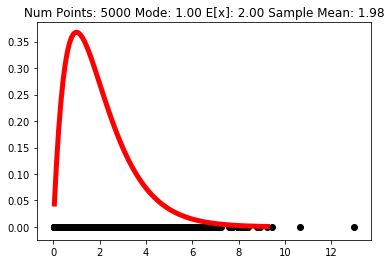

In [2]:
def sampleMeanEx():
	'''sampleMeanEx()'''
	nSamples = (5, 10, 100, 5000)
	a = 2
	b = 1
	for i in range(len(nSamples)):
		fig = plt.figure()
		ax = fig.add_subplot(*[1,1,1])
		draws = np.random.gamma(shape=a,scale=b,size=nSamples[i])
		mode = (a-1)*b
		expectedv = a*b
		samplemean = sum(draws)/len(draws)
		x = np.linspace(gamma.ppf(0.001, a, scale=b), gamma.ppf(0.999, a, scale=b), 100)
		ax.plot(x, gamma.pdf(x, a, scale=b), 'r-', lw=5)
		ax.scatter(draws, np.zeros(len(draws)), c='k')
		myTitle = 'Num Points: ' + str(nSamples[i]) + ' Mode: ' + str("%.2f"%mode) + ' E[x]: ' + str("%.2f"%expectedv) + ' Sample Mean: ' + str("%.2f"%samplemean)
		ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))
		plt.show()

sampleMeanEx()

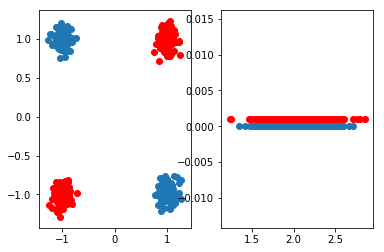

In [3]:
def innerBasisFunc(dataX):
	return np.vstack([dataX[i,:]@dataX[i,:].T for i in range(dataX.shape[0])])

def prodBasisFunc(dataX):
	return np.vstack([dataX[i,0]*dataX[i,1] for i in range(dataX.shape[0])])

def xorExample():
	'''xorExample()'''
	class1X = np.vstack([np.array([-1,-1])+np.random.normal(0,.1,2 ) for i in range(100)])
	class1X = np.vstack((class1X,np.vstack([np.array([1,1])+np.random.normal(0,.1,2 ) for i in range(100)])))
	class2X = np.vstack([np.array([1,-1])+np.random.normal(0,.1,2 ) for i in range(100)])
	class2X = np.vstack((class2X,np.vstack([np.array([-1,1])+np.random.normal(0,.1,2 ) for i in range(100)])))
	phi1X = innerBasisFunc(class1X)
	phi2X = innerBasisFunc(class2X)
    
	fig = plt.figure()
	ax = fig.add_subplot(*[1,2,1])
	ax.scatter(class1X[:,0], class1X[:,1], c='r') 
	ax.scatter(class2X[:,0], class2X[:,1]) 
	ax = fig.add_subplot(*[1,2,2])
	ax.scatter(phi1X, np.zeros(phi1X.shape)+0.001, c='r') 
	ax.scatter(phi2X, np.zeros(phi2X.shape)) 
	plt.show()
    
xorExample()

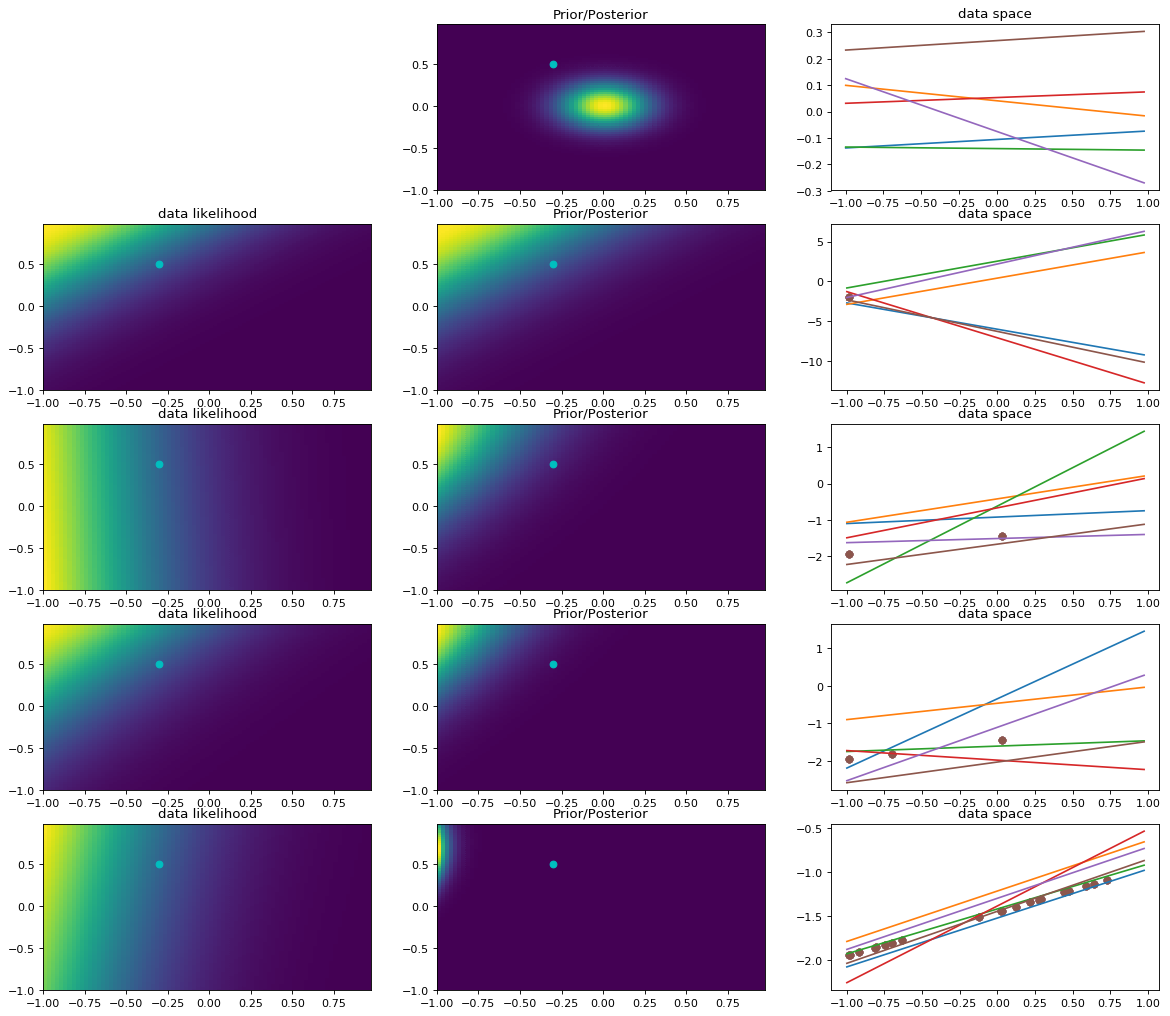

In [4]:
def likelihood_prior_func():   
    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    #set up variables
    a = -0.3
    b = 0.5
    rangeX = [-1, 1]
    step = 0.025
    X = np.mgrid[rangeX[0]:rangeX[1]:step]
    alpha = 30
    beta = 2
    S0 = (1/alpha)*np.eye(2)
    draw_num = (0,1,2,3,20)

    #initialize prior/posterior and sample data
    sigma = S0
    mean = [0,0]
    draws = np.random.uniform(rangeX[0],rangeX[1],size=draw_num[-1])
    T = a + b*draws + np.random.normal(loc=0, scale=math.sqrt(1/beta))

    for i in range(len(draw_num)):
        if draw_num[i]>0: #skip first image
            #Show data likelihood
            Phi = np.vstack((np.ones(draws[0:draw_num[i]].shape), draws[0:draw_num[i]]))
            t = T[0:draw_num[i]]
            sigma = np.linalg.inv(S0 + beta*Phi@Phi.T)
            mean = beta*sigma@Phi@t

            w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
            p = multivariate_normal(t[draw_num[i]-1], 1/beta)
            out = np.empty(w0.shape)
            for j in range(len(w0)):
                out[j] = p.pdf(w0[j]+w1[j]*draws[draw_num[i]-1])

            ax = fig.add_subplot(*[len(draw_num),3,(i)*3+1])
            ax.pcolor(w0, w1, out)
            ax.scatter(a,b, c='c')
            myTitle = 'data likelihood'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        #Show prior/posterior
        w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
        pos = np.empty(w1.shape + (2,))
        pos[:, :, 0] = w0; pos[:, :, 1] = w1
        p = multivariate_normal(mean, sigma)

        ax = fig.add_subplot(*[len(draw_num),3,(i)*3+2])
        ax.pcolor(w0, w1, p.pdf(pos))
        ax.scatter(a,b, c='c')
        myTitle = 'Prior/Posterior'
        ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        #Show data space
        for j in range(6):
            w0, w1 = np.random.multivariate_normal(mean, sigma)
            t = w0 + w1*X
            ax = fig.add_subplot(*[len(draw_num),3,(i)*3+3])
            ax.plot(X,t)
            if draw_num[i] > 0:
                ax.scatter(Phi[1,:], T[0:draw_num[i]])
            myTitle = 'data space'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

    plt.show()

likelihood_prior_func()
